# **<font size=4 color=#BB3D00 face=微软雅黑>回声消除</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/echo-cancelation.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：使用自相关过滤掉由墙壁反射引起的回波</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：使用自相关过滤掉由墙壁反射引起的回波</font>

语音记录包括由墙壁反射引起的回声。 使用自相关将其过滤掉。
在录音中，一个人说出了 MATLAB® 这个词。 加载数据和采样率，通过向记录添加延迟 Δ 样本并通过已知因子衰减的信号副本来模拟回波α：
$$y(n)=x(n)+\alpha x(n-\Delta)$$
指定 0.23 s 的时间延迟和 0.5 的衰减因子。然后绘制原始信号、回波和结果信号。

In [ ]:
!wget https://github.com/spaitlab/pyspt/blob/4cb0037403e2a084f12551b67ccadb8c402907dc/4-%E5%8F%98%E6%8D%A2%E3%80%81%E7%9B%B8%E5%85%B3%E6%80%A7%E5%92%8C%E5%BB%BA%E6%A8%A1/4-2-%E7%9B%B8%E5%85%B3%E6%80%A7%E5%92%8C%E5%8D%B7%E7%A7%AF/4-2-7-Echo%20cancelation/mtlb.mat?raw=true

In [ ]:
!ls

In [ ]:
!mv mtlb.mat\?raw\=true mtlb.mat

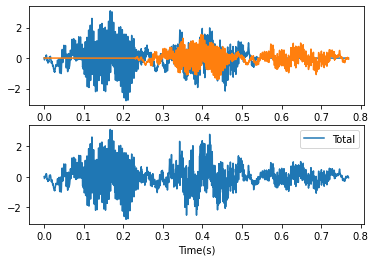

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

m=loadmat("mtlb.mat")
mtlb=m['mtlb']
timelag=0.23
Fs=7418
delta=np.round(Fs*timelag)
delta=int(delta)
alpha=0.5


orig=np.append(mtlb,np.zeros(delta))
echo=np.append(np.zeros(delta),mtlb)*alpha
mtEcho=orig+echo
t=np.arange(0,len(mtEcho),1)/Fs


plt.subplot(211)
plt.plot(t,orig,label='orig')
plt.plot(t,echo,label='Echo')
plt.subplot(212)
plt.plot(t,mtEcho,label='Total')
plt.xlabel('Time(s)')
plt.legend()
plt.show()

计算信号自相关的无偏估计。 选择并绘制与大于零的滞后相对应的部分。

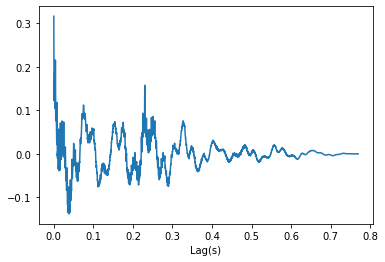

In [3]:
Rmm = signal.correlate(mtEcho,mtEcho,mode='full')
lags = signal.correlation_lags(mtEcho.size, mtEcho.size, mode="full")
Rmm=Rmm[np.where(lags>0)]
Rmm=Rmm/np.size(Rmm)
lags=lags[np.where(lags>0)]

plt.plot(lags/Fs,Rmm)
plt.xlabel('Lag(s)')
plt.show()


自相关在回波到达的滞后处有一个尖峰。 通过 IIR 系统过滤信号来消除回声，其输出，ω服从
$$w(n)+\alpha w(n-\Delta)=y(n)$$
绘制滤波后的信号并与原始信号进行比较。

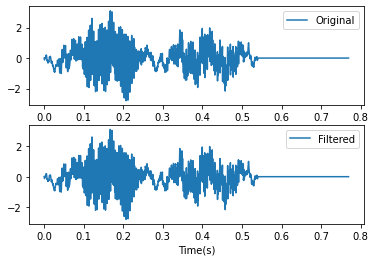

In [4]:
dl,_=signal.find_peaks(Rmm,prominence=0.22)
aa=np.append(np.array([1]),np.zeros(dl))
a=np.append(aa,np.array([alpha]))
zi=signal.lfilter_zi(1,a)*0
mtNew,_=signal.lfilter(np.array([1]),a,mtEcho,zi=zi)

plt.subplot(211)
plt.plot(t,orig,label='Original')
plt.legend()
plt.subplot(212)
plt.plot(t,mtNew,label='Filtered')
plt.legend()
plt.xlabel('Time(s)')
plt.show()